# Car Fuel Analysis

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

Load Data

In [88]:
fuel = pd.read_csv('fuel.csv')

## Data Cleaning

In [89]:
fuel.head(3)

,Date,Mileage,Liters,PPL,Fuel Type,Price,Filled Tank,Driving Style,Roof Racks
0,20/12/2022,"47,671",22.44,139.9,E10,31.39,Y,Motorway,Y
1,24/12/2022,"47,894",24.75,138.9,E10,34.38,Y,Normal,Y
2,02/01/2023,"48,133",27.43,139.9,E10,38.37,Y,Motorway,Y


Reformating variables names into snake case.

In [90]:
fuel.columns = ['_'.join(col.lower().split()) for col in fuel.columns]

Converting the `date` column to a datetime.

In [91]:
fuel["date"] = pd.to_datetime(fuel["date"], format="%d/%m/%Y")

Converting `mileage` to numeric.

In [92]:
fuel["mileage"] = pd.to_numeric(fuel["mileage"].str.replace(",", ""))

Convert `filled_tank` variable to boolean.

In [93]:
fuel["filled_tank"] = fuel["filled_tank"].map({"Y": True, "N": False})

Relabel `roof_rack` variables.

In [94]:
fuel["roof_racks"] = fuel["roof_racks"].replace({"Y": "On", "N": "Off"})

Replace `Supreme` with `SUP` in `fuel_type` column.

In [95]:
fuel["fuel_type"] = fuel["fuel_type"].replace("Supreme", "SUP")

In [96]:
fuel

,date,mileage,liters,ppl,fuel_type,price,filled_tank,driving_style,roof_racks
0,2022-12-20,47671,22.44,139.9,E10,31.39,True,Motorway,On
1,2022-12-24,47894,24.75,138.9,E10,34.38,True,Normal,On
2,2023-01-02,48133,27.43,139.9,E10,38.37,True,Motorway,On
3,2023-01-08,48346,24.67,175.9,E10,43.39,True,Motorway,On
4,2023-01-09,48607,26.92,145.9,E10,39.28,True,Normal,On
5,2023-02-26,48775,22.18,140.9,E10,31.25,True,Mixed,On
6,2023-03-17,48869,10.91,174.9,E5,19.08,True,Normal,On
7,2023-03-17,49091,22.53,167.9,E10,37.83,True,Motorway,On
8,2023-03-18,49257,19.11,139.9,E10,26.73,True,Motorway,On
9,2023-03-25,49453,21.48,139.9,E10,30.05,True,Normal,On


### Processing Fuel Data

- Aggregate instances where the tank was not filled.
- Compute the distance travelled on the fuel put in.

This will allow us to do efficiency analysis.

In [112]:
def process_fuel_data(fuel):
    df = fuel.copy()
    
    for index, row in df.iterrows():
        # pass any columns with a filled tank
        if row['filled_tank']:
            continue
        
        # drop final row and raise error
        if index == df.index[-1]:
            df.drop(index, inplace=True)
            warnings.warn("The final entry had filled_tank = False, so data was lost in processing")
            continue
        
        # update next column in data frame
        for col in ('liters', 'price'):
            df.at[index + 1, col] += row[col] 
        
        df.at[index + 1, 'ppl'] = (100*(df.at[index + 1, 'price'] / df.at[index + 1, 'liters'])).round(1)
        
        for col in ('fuel_type', 'driving_style', 'roof_racks'):
            if df.at[index + 1, col] != row[col]:
                df.at[index + 1, col] = "Mixed"
        
        #drop column
        df.drop(index, inplace=True)
        
        return(df)

process_fuel_data(fuel) #something isnt working!

,date,mileage,liters,ppl,fuel_type,price,filled_tank,driving_style,roof_racks
0,2022-12-20,47671,22.44,139.9,E10,31.39,True,Motorway,On
1,2022-12-24,47894,24.75,138.9,E10,34.38,True,Normal,On
2,2023-01-02,48133,27.43,139.9,E10,38.37,True,Motorway,On
3,2023-01-08,48346,24.67,175.9,E10,43.39,True,Motorway,On
4,2023-01-09,48607,26.92,145.9,E10,39.28,True,Normal,On
5,2023-02-26,48775,22.18,140.9,E10,31.25,True,Mixed,On
6,2023-03-17,48869,10.91,174.9,E5,19.08,True,Normal,On
7,2023-03-17,49091,22.53,167.9,E10,37.83,True,Motorway,On
8,2023-03-18,49257,19.11,139.9,E10,26.73,True,Motorway,On
9,2023-03-25,49453,21.48,139.9,E10,30.05,True,Normal,On


In [110]:
fuel.at[16, 'fuel_type']

'SUP'

## Analysis

### Mileage

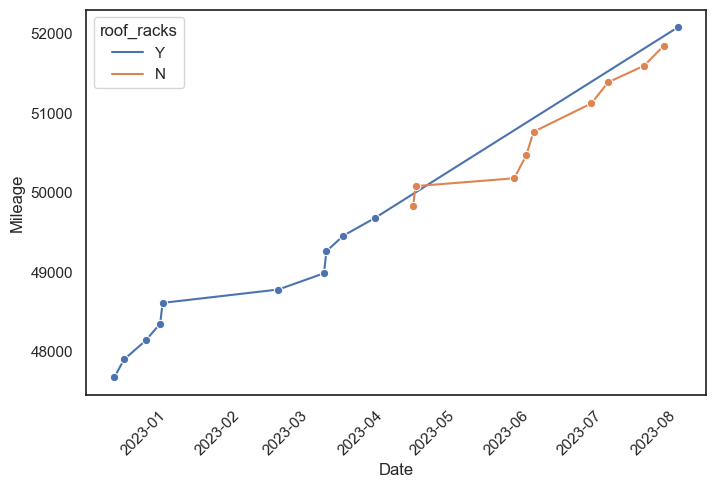

In [44]:
plt.figure(figsize=(8, 5))

sns.lineplot(data=fuel, x="date", y="mileage", marker="o", ci=None, hue="roof_racks")
plt.xlabel("Date")
plt.ylabel("Mileage")
plt.xticks(rotation=45)

plt.show()

### Fuel Efficiency

## Tools and Utilities